In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np
from numpy.linalg import inv

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs

In [3]:
df = pd.DataFrame(data=[(49, 124), 
                        (69, 95), 
                        (89, 71), 
                        (99, 45),
                        (109, 18),
],
                  columns=['price', 'demand'])
df

,price,demand
0,49,124
1,69,95
2,89,71
3,99,45
4,109,18


In [4]:
df.cov()

,price,demand
price,580.0,-983.0
demand,-983.0,1717.3


In [5]:
df.corr()

,price,demand
price,1.000000,-0.984955
demand,-0.984955,1.000000


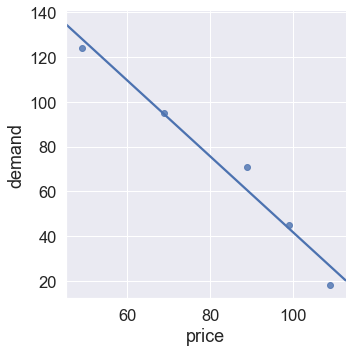

In [6]:
sns.lmplot(x='price', y='demand', data=df, ci=None)

In [7]:
X = df.price.values
X

array([ 49,  69,  89,  99, 109], dtype=int64)

In [8]:
X = X.reshape((len(X), 1))
X

array([[ 49],
       [ 69],
       [ 89],
       [ 99],
       [109]], dtype=int64)

In [9]:
n, m = X.shape 
col_ones = np.ones((n, 1))
col_ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [10]:
Xnew = np.hstack((col_ones, X))
Xnew

array([[  1.,  49.],
       [  1.,  69.],
       [  1.,  89.],
       [  1.,  99.],
       [  1., 109.]])

In [11]:
X_transpose = Xnew.T
X_transpose

array([[  1.,   1.,   1.,   1.,   1.],
       [ 49.,  69.,  89.,  99., 109.]])

In [12]:
y = df.demand.values
y

array([124,  95,  71,  45,  18], dtype=int64)

In [13]:
y = y.reshape((len(X), 1))
y

array([[124],
       [ 95],
       [ 71],
       [ 45],
       [ 18]], dtype=int64)

In [13]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [67]:
# Linear Equation in matrix form is
# Y = XB + E

In [68]:
# Solution is 
# B = (XT.X)-1 . XTY

In [14]:
# find the coeff matrix, B

np.dot(X_transpose, Xnew)

array([[5.0000e+00, 4.1500e+02],
       [4.1500e+02, 3.6765e+04]])

In [15]:
part1 = inv(np.dot(X_transpose, Xnew))
part1

array([[ 3.16939655e+00, -3.57758621e-02],
       [-3.57758621e-02,  4.31034483e-04]])

In [16]:
part2 = np.dot(X_transpose, y)
part2

array([[  353.],
       [25367.]])

In [17]:
B = np.dot(part1, part2)
B

array([[211.27068966],
       [ -1.69482759]])

In [30]:
# f(x) = 211 -1.7X

In [29]:
# SSE 
df

,price,demand
0,49,124
1,69,95
2,89,71
3,99,45
4,109,18


In [30]:
df['fx'] = 211 + (-1.7) * df['price']
df['error'] = df['demand'] - df['fx']
df['error(sq)'] = df['error'] * df['error']
df

,price,demand,fx,error,error(sq)
0,49,124,127.7,-3.7,13.69
1,69,95,93.7,1.3,1.69
2,89,71,59.7,11.3,127.69
3,99,45,42.7,2.3,5.29
4,109,18,25.7,-7.7,59.29


In [31]:
df['error(sq)'].sum()

207.6499999999998

In [32]:
E = df['error'].values
print(E)
E = E.reshape(len(E), 1)
print(E)

[-3.7  1.3 11.3  2.3 -7.7]
[[-3.7]
 [ 1.3]
 [11.3]
 [ 2.3]
 [-7.7]]


In [33]:
SSE = np.dot(E.T, E)
SSE

array([[207.65]])